In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [2]:
#Loading the file into dataframe
db = pd.read_csv("Loan_default.csv")
db=pd.DataFrame(db)

#Checking the shape of data
print("Database raw shape (%s,%s)" % np.shape(db))

Database raw shape (255347,18)


In [3]:
db.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
#Dropping the Loan ID column as it is irrelevant

db.drop(columns=['LoanID'],inplace=True)

In [5]:
#Seeing the first five rows of dataframe

db.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [6]:
#checking for data types and null values

db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  object 
 10  EmploymentType  255347 non-null  object 
 11  MaritalStatus   255347 non-null  object 
 12  HasMortgage     255347 non-null  object 
 13  HasDependents   255347 non-null  object 
 14  LoanPurpose     255347 non-null  object 
 15  HasCoSigner     255347 non-null  object 
 16  Default         255347 non-null  int64  
dtypes: float64

In [7]:
#Transforming all the categorical features into numerical features using LabelEncoder

label_encoder = preprocessing.LabelEncoder()

db['Education']= label_encoder.fit_transform(db['Education'])
db['EmploymentType']= label_encoder.fit_transform(db['EmploymentType'])
db['MaritalStatus']= label_encoder.fit_transform(db['MaritalStatus'])
db['HasMortgage']= label_encoder.fit_transform(db['HasMortgage'])
db['HasDependents']= label_encoder.fit_transform(db['HasDependents'])
db['LoanPurpose']= label_encoder.fit_transform(db['LoanPurpose'])
db['HasCoSigner']= label_encoder.fit_transform(db['HasCoSigner'])

db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  int64  
 10  EmploymentType  255347 non-null  int64  
 11  MaritalStatus   255347 non-null  int64  
 12  HasMortgage     255347 non-null  int64  
 13  HasDependents   255347 non-null  int64  
 14  LoanPurpose     255347 non-null  int64  
 15  HasCoSigner     255347 non-null  int64  
 16  Default         255347 non-null  int64  
dtypes: float64

In [8]:
db.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0


In [9]:
#counting the number of missing values in each column

db.isnull().sum()

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [10]:
#checking if there are any duplicate rows

len(db)-len(db.drop_duplicates())

0

In [11]:
#Checking the statistics of data

db.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,1.494421,1.500096,0.999918,0.500014,0.500268,2.000501,0.500108,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,1.118826,1.117358,0.816051,0.500001,0.500001,1.412723,0.500001,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,2.000000,2.000000,2.000000,1.000000,1.000000,3.000000,1.000000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,3.000000,3.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


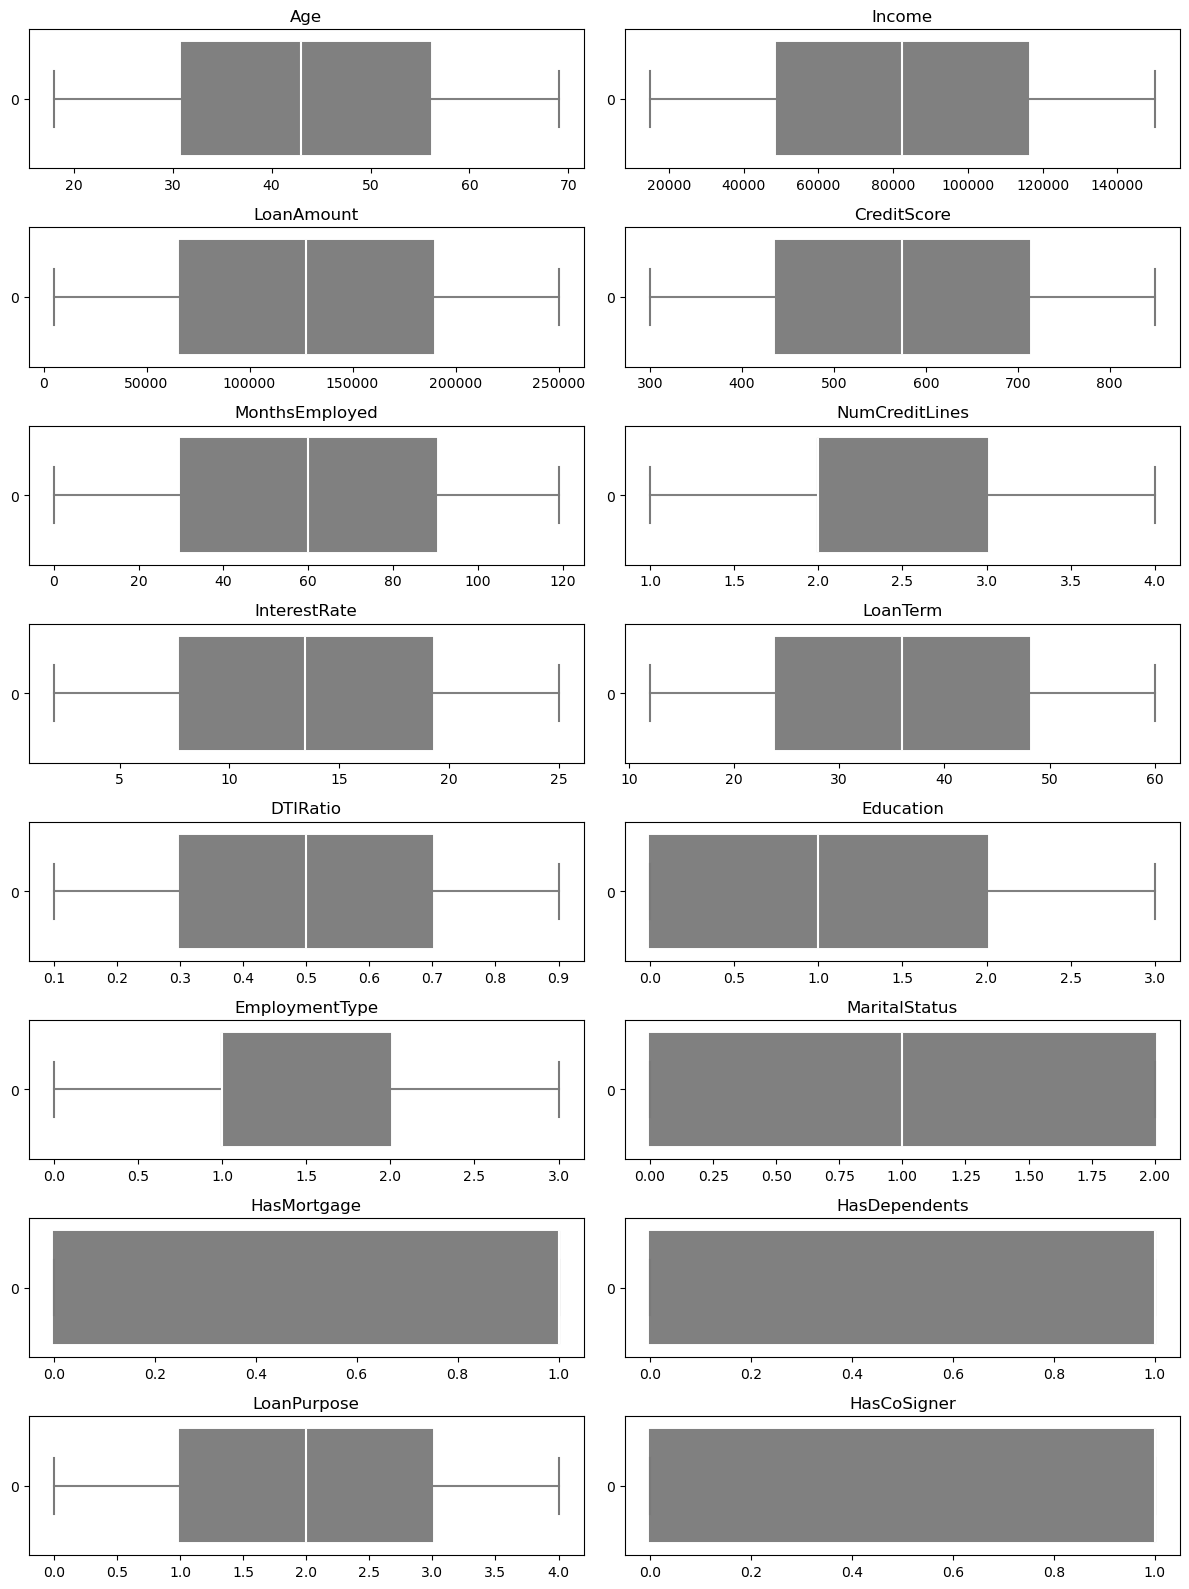

In [12]:

# Checking outliers by plotting boxplots of all the columns/features

fig, axs = plt.subplots(8, 2, figsize=(12, 16))
columns = db.columns

palette = sns.color_palette("pastel")  # Using a pastel color palette
boxprops = dict(facecolor='lightgrey', color='grey')  # Using light grey for the box color
whiskerprops = dict(color='grey')  # Using grey for the whiskers
medianprops = dict(color='white')  # Using white for the median line

for i, ax in enumerate(axs.flat):
    if i < len(columns):  # Check if index is within the range of columns
        sns.boxplot(db.iloc[:, i], ax=ax, orient='h', palette=palette, boxprops=boxprops, whiskerprops=whiskerprops, medianprops=medianprops)
        ax.set_title(columns[i])

#fitting the plot to area
plt.tight_layout()

plt.show()


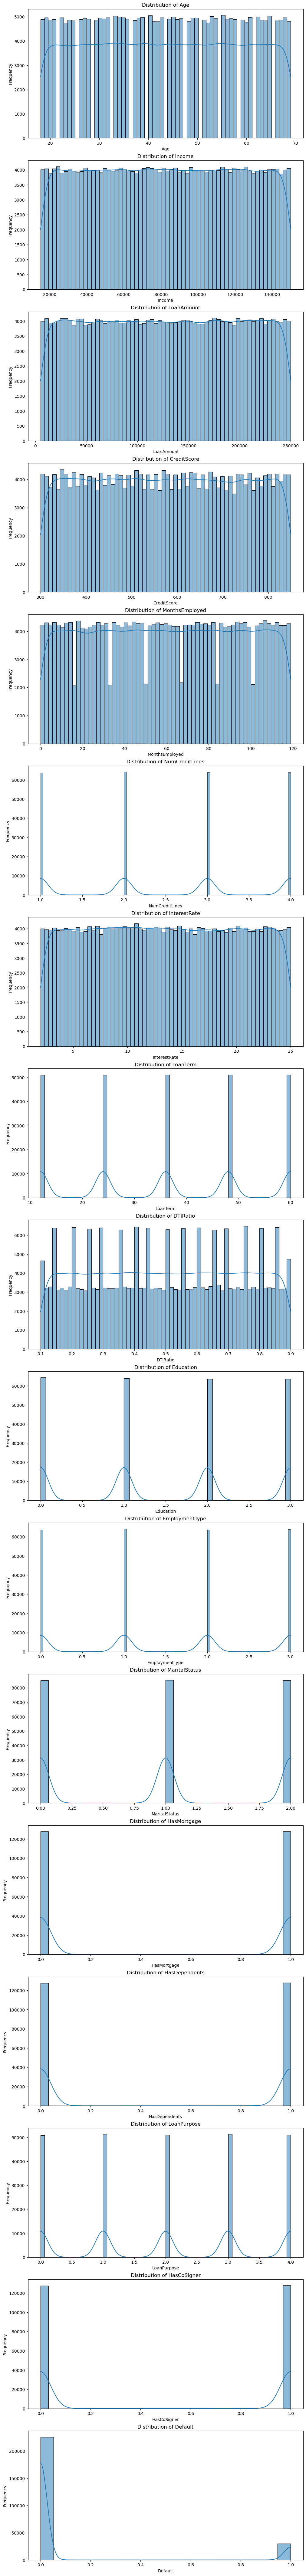

In [13]:

#Plotting histograms for each column to see data distribution
fig, axs = plt.subplots(len(db.columns), 1, figsize=(10, 5 * len(db.columns)), constrained_layout=True)

for i, column in enumerate(db.columns):
    sns.histplot(db[column], ax=axs[i], kde=True)
    axs[i].set_title(f'Distribution of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Frequency')

plt.savefig('Histograms.png')
    
plt.show()


Value: 0, Count: 225694
Value: 1, Count: 29653


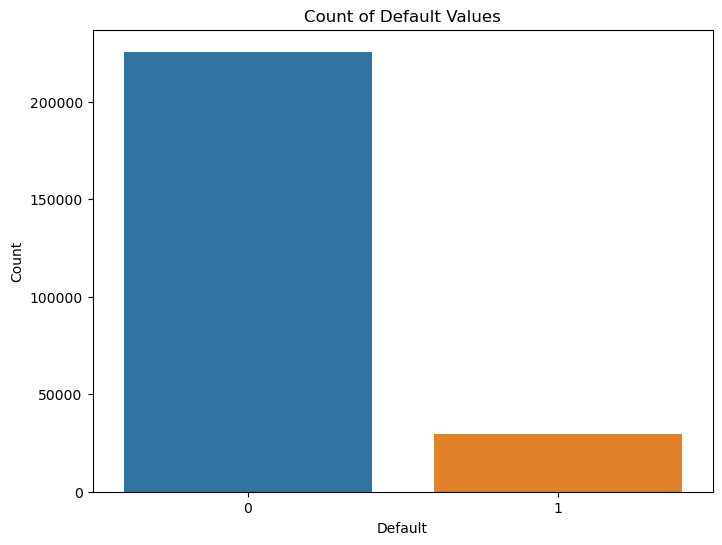

In [14]:
# Plotting and printing the count of target column to check if data is imbalanced

plt.figure(figsize=(8, 6))
sns.countplot(data=db, x='Default')
plt.title('Count of Default Values')
plt.xlabel('Default')
plt.ylabel('Count')

default_counts = db['Default'].value_counts()
for value, count in default_counts.items():
    print(f"Value: {value}, Count: {count}")
    
plt.show()


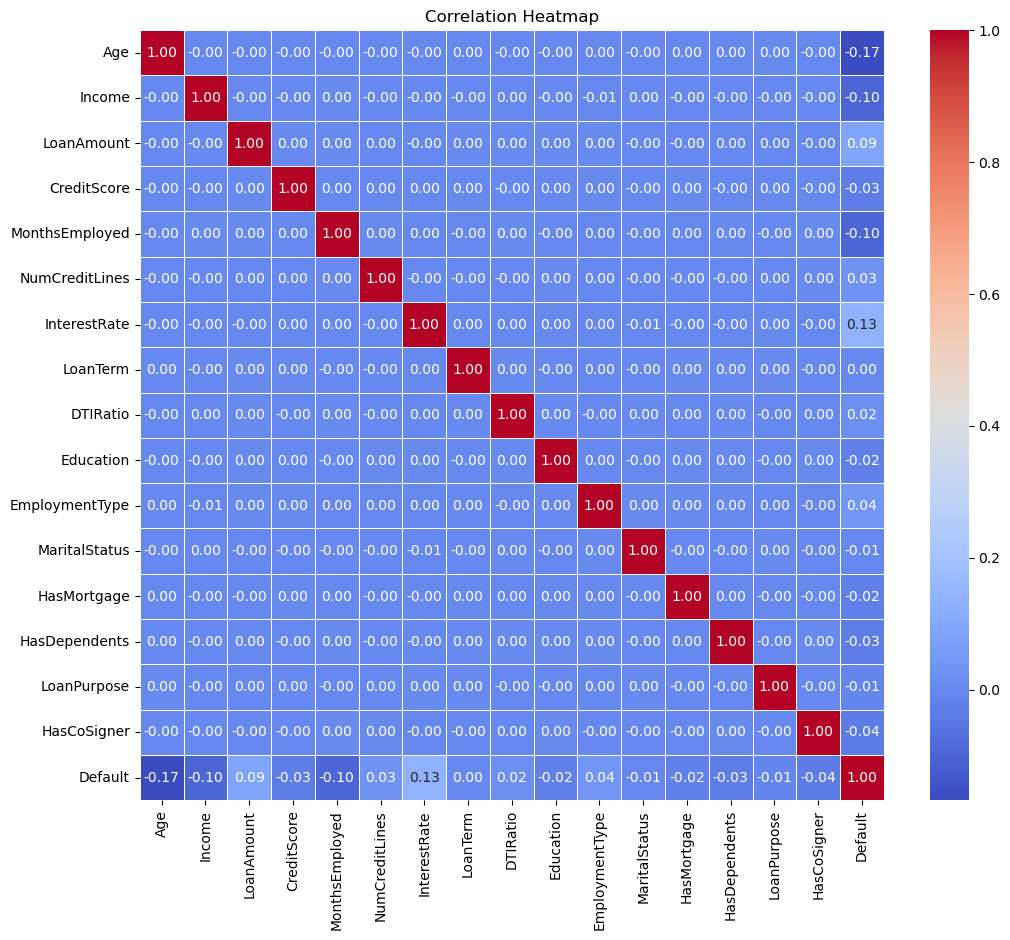

In [15]:
#Plotting the heatmap to see correlation between columns

correlation_matrix = db.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')

plt.show()


In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE

# Separating features and target variable
X = db.drop(columns=['Default'])
y = db['Default']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE to the training data as data is imbalanced
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#Implementing multilayer perceptron

# Defining the parameter grid
param_grid = {
    'hidden_layer_sizes': [(16, 2), (16, 16), (2, 16)],  # Three variations for layer sizes
    'activation': ['relu', 'tanh'], #Two activation functions
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.003, 0.01, 0.03],  # Specify the learning rates to be tuned
    'momentum': [0.3, 1, 3],  # Specify the momentum values to be tuned
}

# Initializing the MLPClassifier
mlp_classifier = MLPClassifier(random_state=42)

# Performing grid search
grid_search = GridSearchCV(estimator=mlp_classifier, param_grid=param_grid, cv=3)
grid_search.fit(X_train_resampled, y_train_resampled)

# Getting the best parameters from grid search results
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Initializing and training the multilayer perceptron classifier with the best parameters
best_mlp_classifier = MLPClassifier(random_state=42, **best_params)
best_mlp_classifier.fit(X_train_resampled, y_train_resampled)

# Predicting on the testing set
y_pred_mlp = best_mlp_classifier.predict(X_test)

# Calculating accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Accuracy of Multilayer Perceptron:", accuracy_mlp)

# Calculating ROC-AUC score
roc_auc_mlp = roc_auc_score(y_test, best_mlp_classifier.predict_proba(X_test)[:, 1])
print("ROC-AUC Score for Multilayer Perceptron:", roc_auc_mlp)


/Users/mituljain/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mituljain/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mituljain/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mituljain/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/mituljain/ana

Best parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (16, 2), 'learning_rate_init': 0.003, 'momentum': 0.3, 'solver': 'adam'}
Accuracy of Multilayer Perceptron: 0.8268455061680047
ROC-AUC Score for Multilayer Perceptron: 0.5710434854391883


In [ ]:
#Implementing SVM

from sklearn.svm import SVC
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import make_pipeline

# Defining the pipeline
pipeline = make_pipeline(RBFSampler(random_state=42), SVC(probability=True, random_state=42))

# Defining the parameter grid
param_grid = {
    'svc__C': [0.1, 1, 10],           # Box Constraint (C)
    'rbfsampler__gamma': [0.1, 1],     # Gamma parameter for RBFSampler
}

# Performing grid search with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3)
grid_search.fit(X_train_resampled, y_train_resampled)

# Getting the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Initializing SVM classifier with the best parameters
best_svm_classifier = SVC(**best_params, probability=True, random_state=42)

# Training the SVM classifier on the resampled training data
best_svm_classifier.fit(X_train_resampled, y_train_resampled)

# Predicting on the testing set
y_pred_svm = best_svm_classifier.predict(X_test)

# Calculating accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy of SVM:", accuracy_svm)

# Calculating ROC-AUC score
roc_auc_svm = roc_auc_score(y_test, best_svm_classifier.predict_proba(X_test)[:, 1])
print("ROC-AUC Score for SVM:", roc_auc_svm)


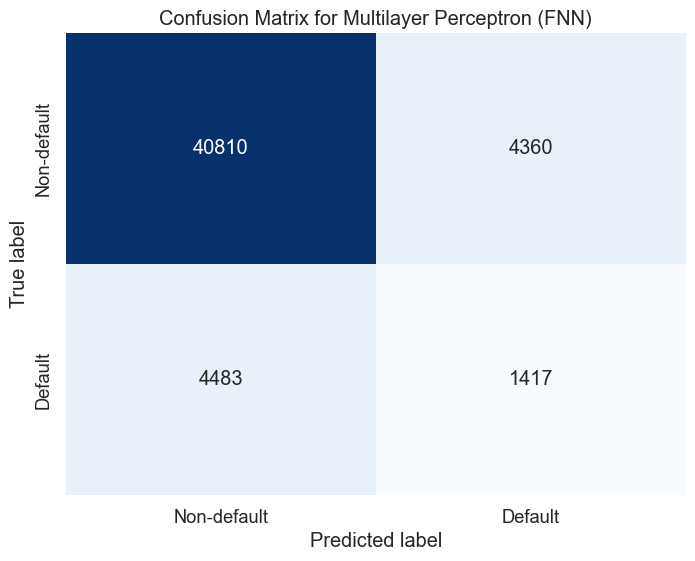

In [19]:
from sklearn.metrics import confusion_matrix

# Calculating confusion matrix for Multilayer Perceptron (FNN)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix_mlp, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Non-default', 'Default'], yticklabels=['Non-default', 'Default'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Multilayer Perceptron (FNN)')
plt.show()


In [ ]:
# Calculating confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix_svm, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Non-default', 'Default'], yticklabels=['Non-default', 'Default'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Support Vector Machine (SVM)')
plt.show()


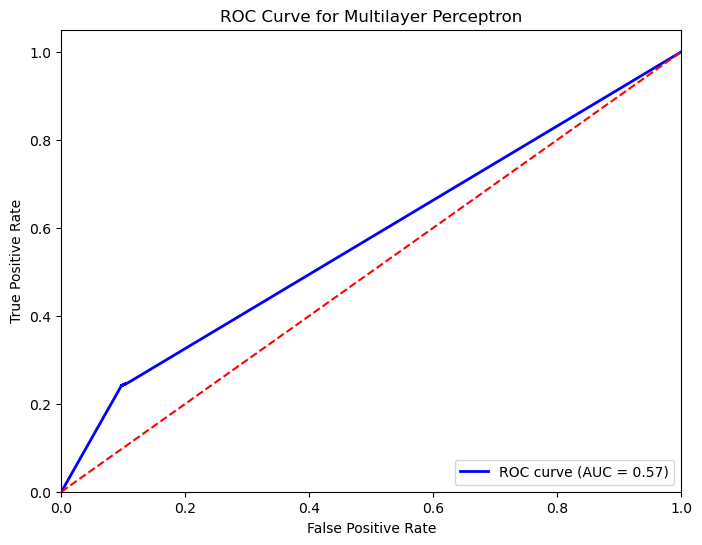

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

y_pred_proba = best_mlp_classifier.predict_proba(X_test)[:, 1]

# Calculating the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plotting ROC curve for MLP
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_mlp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multilayer Perceptron')
plt.legend(loc="lower right")
plt.show()


In [ ]:

y_pred_proba_svm = best_svm_classifier.predict_proba(X_test)[:, 1]

# Calculating the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_proba_svm)

# Plotting ROC curve for SVM
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Support Vector Machine')
plt.legend(loc="lower right")
plt.show()


In [3]:
pip install nbconvert


Note: you may need to restart the kernel to use updated packages.
